## Loading libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
pd.set_option('display.max_columns', None)
import re

## Loading data

In [2]:
data = pd.read_csv('/Users/claudia/Ironhack/Mid-Bootcamp Project/Linear_Regression_MidBootCampProject-/df_5th_iter.csv') # this file is in files after the first iteration
data.head()

,Unnamed: 0,sqft_living,sqft_above,bathrooms,view,grade,price
0,0,1180,1180,1.00,0,7,221900
1,1,2570,2170,2.25,0,7,538000
2,2,770,770,1.00,0,6,180000
3,3,1960,1050,3.00,0,7,604000
4,4,1680,1680,2.00,0,8,510000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   21597 non-null  int64  
 1   sqft_living  21597 non-null  int64  
 2   sqft_above   21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   view         21597 non-null  int64  
 5   grade        21597 non-null  int64  
 6   price        21597 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 1.2 MB


In [4]:
data = data.drop(['Unnamed: 0'], axis=1)

In [5]:
data.shape

(21597, 6)

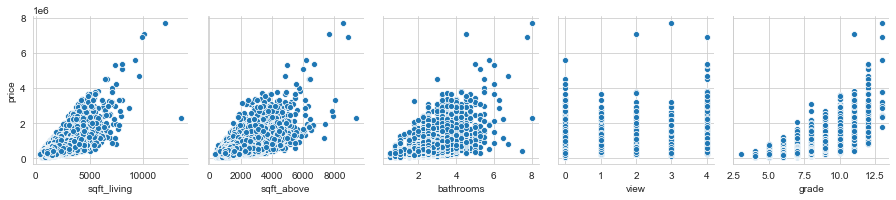

In [6]:
sns.pairplot(data = data, x_vars = ['sqft_living','sqft_above','bathrooms','view','grade'], y_vars = 'price');

## I'm using the discrete features as such, without turning them into categorical

In [7]:
categoricals = data.select_dtypes(np.object)
numericals = data.select_dtypes(np.number)


print("Dataframe of numerical columns: ")
print()

display(numericals)

print("Dataframe of categorical columns: ")
print()

display(categoricals)

Dataframe of numerical columns: 



,sqft_living,sqft_above,bathrooms,view,grade,price
0,1180,1180,1.00,0,7,221900
1,2570,2170,2.25,0,7,538000
2,770,770,1.00,0,6,180000
3,1960,1050,3.00,0,7,604000
4,1680,1680,2.00,0,8,510000
...,...,...,...,...,...,...
21592,1530,1530,2.50,0,8,360000
21593,2310,2310,2.50,0,8,400000
21594,1020,1020,0.75,0,7,402101
21595,1600,1600,2.50,0,8,400000


Dataframe of categorical columns: 



""
0
1
2
3
4
...
21592
21593
21594
21595


## Normalising the numerical data with StandarScaler

In [8]:
#Lets apply scaling to the numerical columns except the final column
#which will be our y variable, average gift

from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(numericals.iloc[:,:-1])
scaled_numericals = transformer.transform(numericals.iloc[:,:-1])

Getting a dataframe with the result from the standard scaler which is a numpy array.

As the numpy arrays doesn't have column names, we pick up the column names from the numerical (original) dataframe.

## Putting everything together

In [9]:
X = scaled_numericals

In [10]:
#define X and y. 
#X is all the features, scaled numericals and encoded categoricals which are our independent variables
#y is the variable we seek to predict 

X = X
y = numericals['price']

In [11]:
# Normalazing Y 
sc_y = StandardScaler()
y = np.array(y).reshape(-1,1)
y = sc_y.fit_transform(y)
#y = y.flatten()
y

array([[-0.86671627],
       [-0.00625157],
       [-0.98077344],
       ...,
       [-0.37618606],
       [-0.38190525],
       [-0.58606486]])

In [12]:
X

array([[-0.98065209, -0.73525069, -1.45107268, -0.30571547, -0.56080027],
       [ 0.53336915,  0.46077619,  0.17448579, -0.30571547, -0.56080027],
       [-1.4272339 , -1.23057495, -1.45107268, -0.30571547, -1.41318983],
       ...,
       [-1.15492792, -0.92854796, -1.77618438, -0.30571547, -0.56080027],
       [-0.52317805, -0.22784535,  0.49959749, -0.30571547,  0.2915893 ],
       [-1.15492792, -0.92854796, -1.77618438, -0.30571547, -0.56080027]])

## Splitting data intro train and test sets.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Getting prediction with Linear Regression

In [14]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
#apply the machine learn model 
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)
#use r2 score to see if this is closer to the data (ie better at predicating 
#target_d, than without the help of the learning process)

0.569632917911773

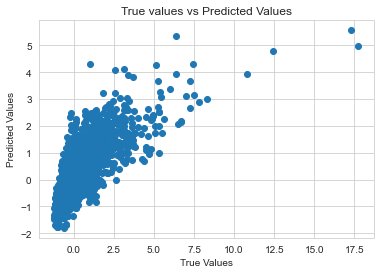

In [16]:
plt.scatter(x=y_test, y=predictions)
plt.title("True values vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.show()

## Training the K-NN model

In [17]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=4) # The keyword "n_neighbors" is what sets the K.
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

## Getting our predictions

In [18]:
knn_predictions = knn_model.predict(X_test)
# to get some predictions for y we use the x test set. 
# we will later compare the predictions from x test to real test y 

## Getting the error metrics of our K-NN model

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.42
The mean squared error of the model in the test set is:   0.43
The root mean squared error of the model in the test set is:   0.66
The R2 of the model in the test set is: 0.57


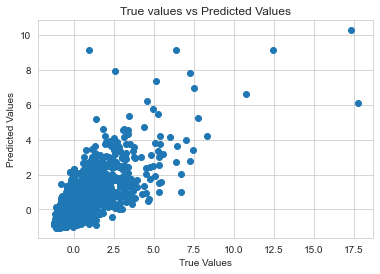

In [20]:
plt.scatter(x=y_test, y=knn_predictions)
plt.title("True values vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.show()

K 
Let's try to find the best K value from a pre-defined set of values.

In [21]:
scores = [] # We will store here the R2 values for each of our K-NN models with different K-values.
for i in range(2,10): # The values of K. = 2,3,4,5,6,7,8,9
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Now let's plot how it changes the score as a function of K.

Text(0, 0.5, 'R2')

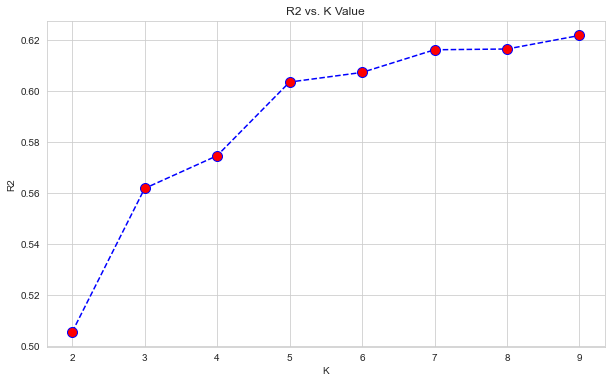

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

#threshold = 0.01 # minimum difference we want between two R2 consecutive values.
#delta = 10. # difference between two consecutive R2 values.
#k = 3 # initival value
#old_score = 0.

#while (delta >= threshold):
#  knn_model = KNeighborsRegressor(n_neighbors=k) # The keyword "n_neighbors" is what sets the K.
#  knn_model.fit(X_train, y_train)
#  knn_predictions = knn_model.predict(X_test) 
#  new_score = r2_score(y_test,knn_predictions)
#  delta = new_score - old_score
#  k = k + 4 
#  old_score = new_score

Applying a higher K suggested by the test


In [23]:
uniform_model = KNeighborsRegressor(n_neighbors=9)
uniform_model.fit(X_train, y_train)
uniform_model.score(X_test, y_test)

0.6217000398847619

## Best predicted score for this iteration is 0.62